In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/twitter_training.csv')
vla = pd.read_csv('/content/twitter_validation.csv')
col = ['Tweet Id', 'Entity','Sentiment','Tweet Content']
data.columns = col
vla.columns = col
data

,Tweet Id,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet Id       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
data.Sentiment.value_counts()

,count
Sentiment,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


In [5]:
data.isna().value_counts()

Tweet Id  Entity  Sentiment  Tweet Content
False     False   False      False            73995
                             True               686
Name: count, dtype: int64

In [6]:
data.dropna(inplace=True)

<ipython-input-7-4a9b1a10df8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment',data=data, palette="viridis")


<Axes: xlabel='Sentiment', ylabel='count'>

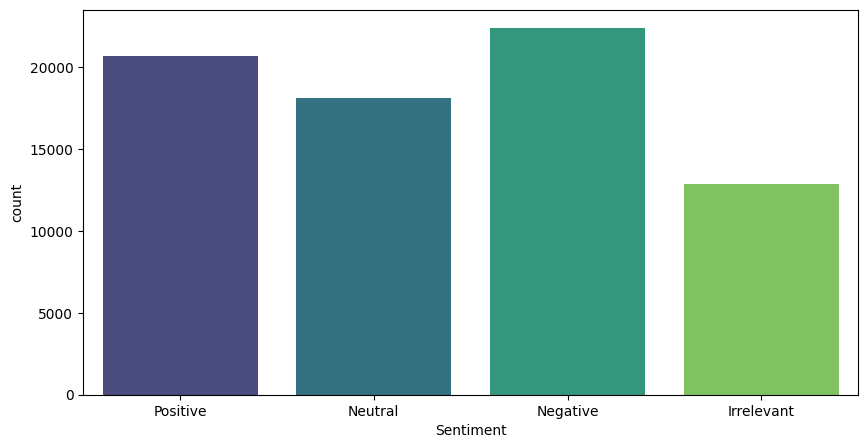

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment',data=data, palette="viridis")

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
lemma = WordNetLemmatizer()
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprossing_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = text.lower()
  text = text.split()
  token = [ps.stem(text) for text in text if text not in stop_words]
  return " ".join(token)

In [10]:
data['Tweet Content'] = data['Tweet Content'].apply(preprossing_text)
data['Tweet Content']

,Tweet Content
0,come border kill
1,im get borderland kill
2,im come borderland murder
3,im get borderland 2 murder
4,im get borderland murder
...,...
74676,realiz window partit mac like 6 year behind nv...
74677,realiz mac window partit 6 year behind nvidia ...
74678,realiz window partit mac 6 year behind nvidia ...
74679,realiz window partit mac like 6 year behind nv...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tf = TfidfVectorizer(max_features=5000)
x = tf.fit_transform(data['Tweet Content'])
y = data['Sentiment']
print(x.shape)
print(y.shape)

(73995, 5000)
(73995,)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
model = {
    LogisticRegression(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
}
for m in model:
  m.fit(X_train,y_train)
  y_pred = m.predict(X_test)
  print(m)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

RandomForestClassifier()
0.888573552267045
              precision    recall  f1-score   support

  Irrelevant       0.94      0.83      0.88      2624
    Negative       0.91      0.90      0.90      4463
     Neutral       0.83      0.91      0.87      3589
    Positive       0.89      0.90      0.90      4123

    accuracy                           0.89     14799
   macro avg       0.89      0.88      0.89     14799
weighted avg       0.89      0.89      0.89     14799

DecisionTreeClassifier()
0.7860666261233867
              precision    recall  f1-score   support

  Irrelevant       0.78      0.71      0.74      2624
    Negative       0.83      0.81      0.82      4463
     Neutral       0.72      0.80      0.76      3589
    Positive       0.80      0.80      0.80      4123

    accuracy                           0.79     14799
   macro avg       0.78      0.78      0.78     14799
weighted avg       0.79      0.79      0.79     14799



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
0.6828164065139537
              precision    recall  f1-score   support

  Irrelevant       0.69      0.52      0.59      2624
    Negative       0.72      0.76      0.74      4463
     Neutral       0.63      0.64      0.64      3589
    Positive       0.69      0.73      0.71      4123

    accuracy                           0.68     14799
   macro avg       0.68      0.67      0.67     14799
weighted avg       0.68      0.68      0.68     14799

MultinomialNB()
0.6413946888303264
              precision    recall  f1-score   support

  Irrelevant       0.75      0.37      0.49      2624
    Negative       0.62      0.79      0.70      4463
     Neutral       0.67      0.53      0.59      3589
    Positive       0.62      0.74      0.68      4123

    accuracy                           0.64     14799
   macro avg       0.66      0.61      0.61     14799
weighted avg       0.66      0.64      0.63     14799

SVC()
0.8932360294614501
              precision    rec

In [15]:
import pickle

In [16]:
pickle.dump(tf,open('tf.pkl','wb'))